
<h1 align="center">Heart Failure Prediction</h1>

<h4 align="center">Domain: Healthcare and Medical Research</h4>


**Dataset Name**: Heart Failure Prediction

**Description**: This dataset contains clinical records of patients who were diagnosed with heart failure, collected in 2015. The data is intended to aid in the prediction of heart failure outcomes, based on various clinical and demographic features. It includes 12 features collected during follow-up visits that can be used to predict mortality by heart failure.

**Source**: The dataset is sourced from Kaggle [link](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data)

**Citation**: Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). ([link](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5))

**Objective**: To develop a predictive model to identify patients at risk of heart failure. By analyzing the clinical features, the model can help healthcare providers take preventive measures and improve patient outcomes:

1.   Identify key clinical indicators that are predictive of heart failure
2.   Evaluate different machine learning models to find a most accurate predictor
3.   Provide actionable insights for healthcare providers to improve management and preventive care for patients.





<h2>Explanation of each column:</h2>

| Column Name       | Description                                              | Data Type | Notes                               |
|-------------------|----------------------------------------------------------|-----------|-------------------------------------|
| age               | Age of the patient                                       | Float   | Years                               |
| anaemia           | Presence of anemia                                       | Integer   | 1: Yes, 0: No                       |
| creatinine_phosphokinase | Level of the CPK enzyme in the blood                 | Integer   | mcg/L                               |
| diabetes          | Presence of diabetes                                     | Integer   | 1: Yes, 0: No                       |
| ejection_fraction | Percentage of blood leaving the heart with each contraction | Integer   | Percentage                          |
| high_blood_pressure | Presence of high blood pressure                        | Integer   | 1: Yes, 0: No                       |
| platelets         | Platelet count in the blood                              | Float     | kiloplatelets/mL                    |
| serum_creatinine  | Level of serum creatinine in the blood                   | Float     | mg/dL                               |
| serum_sodium      | Level of serum sodium in the blood                       | Integer   | mEq/L                               |
| sex               | Gender of the patient                                    | Integer   | 1: Male, 0: Female                  |
| smoking           | Smoking status                                           | Integer   | 1: Yes, 0: No                       |
| time              | Follow-up period (days)                                  | Integer   | Days                                |
| DEATH_EVENT       | Death event (target variable)                            | Integer   | 1: Yes, 0: No                       |


###Visual inspection of the data

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame
df = pd.read_csv('Healthcare_Heart.csv')

# Information about DataFrame size
num_rows, num_columns = df.shape
print(f"The DataFrame has {num_rows} rows and {num_columns} columns.")

The DataFrame has 299 rows and 13 columns.


In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df['DEATH_EVENT'].value_counts()


DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Indicates class imbalance. May need to use weighted in analysis.

###Exploratory Data Analysis (EDA)

Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.

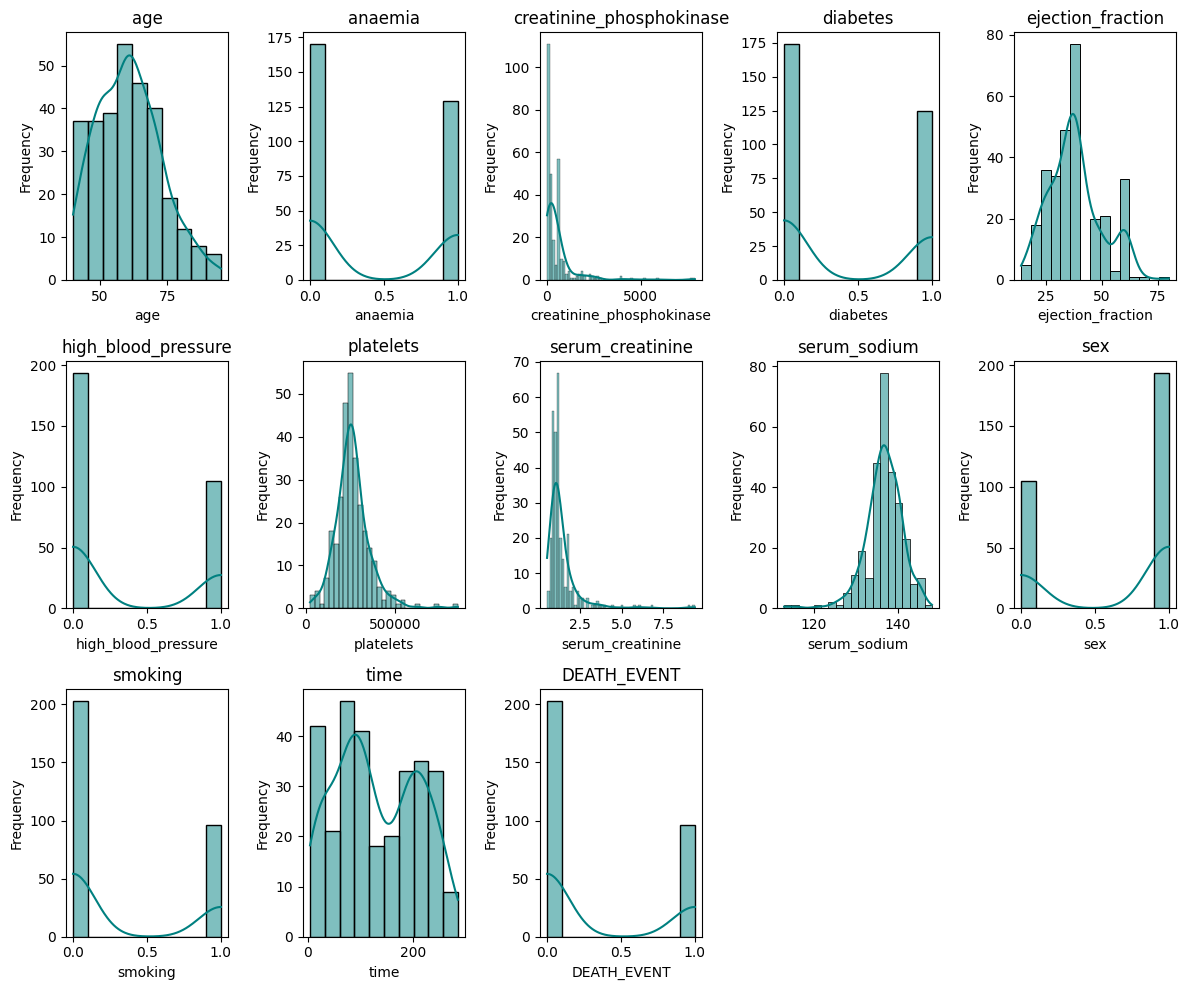


Correlation Summaries:
smoking and sex: There is a moderate correlation (0.4459).
DEATH_EVENT and time: There is a moderate correlation (-0.5270).


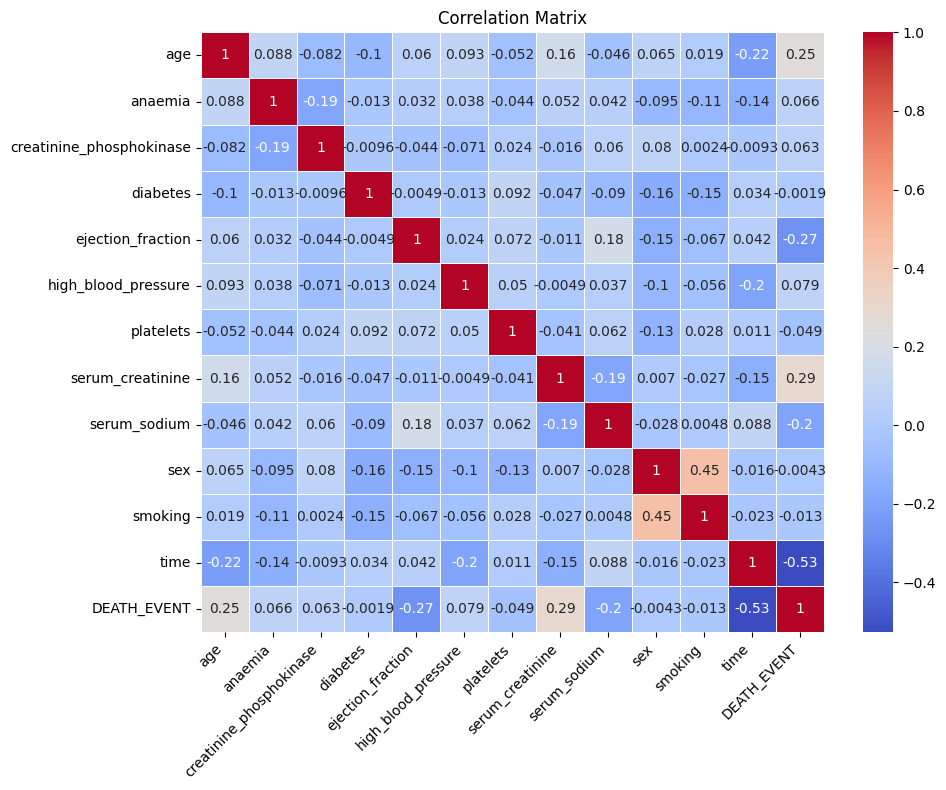


Variance of Numerical Columns:
age                         1.414865e+02
anaemia                     2.461224e-01
creatinine_phosphokinase    9.414586e+05
diabetes                    2.441023e-01
ejection_fraction           1.400635e+02
high_blood_pressure         2.286144e-01
platelets                   9.565669e+09
serum_creatinine            1.070211e+00
serum_sodium                1.946996e+01
sex                         2.286144e-01
smoking                     2.187156e-01
time                        6.023965e+03
DEATH_EVENT                 2.187156e-01
dtype: float64


In [ ]:
# Dataframe Information
print("Dataframe Information:")
print(df.info())

# Check for missing values
missing_values = df.isnull().sum().sum()
print()
if missing_values == 0:
    print("There are no missing values in the DataFrame.")
else:
    print(f"There are {missing_values} missing values in the DataFrame.")
print()

#Check for duplicates
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found in the DataFrame:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in the DataFrame.")
print()

# Check unique values
print("Unique Values:")
categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'] # binary
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals}")
print()

# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())
print()

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Check for outliers - numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Using IQR method for each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Column '{col}' has {len(outliers)} outliers according to IQR method.")
print()
print("At this point, we will keep the outliers as they may be clinically significant and represent real,\nvalid cases. It may also ensure that the future model accounts for any possible scenarious including extreme cases.")
print()
print()

print("Histograms:")
print()
# Histograms for numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print()

# Correlation matrix
corr_matrix = df.corr()

# Define thresholds for interpreting correlations
moderate_corr_threshold = 0.3
high_corr_threshold = 0.6

# Function to summarize correlations
def summarize_correlations(corr_matrix):
    print("Correlation Summaries:")
    visited_pairs = set()  # To keep track of visited pairs
    for i, col in enumerate(corr_matrix.columns):
        for j, row in enumerate(corr_matrix.index):
            if i != j:  # Exclude self-correlation (diagonal elements)
                pair = tuple(sorted([row, col]))  # Sort pair to avoid duplicate output
                if pair not in visited_pairs:
                    visited_pairs.add(pair)
                    correlation = corr_matrix.loc[row, col]  # Access correlation value
                    if abs(correlation) >= high_corr_threshold:
                        print(f"{row} and {col}: There is a high correlation ({correlation:.4f}).")
                    elif abs(correlation) >= moderate_corr_threshold:
                        print(f"{row} and {col}: There is a moderate correlation ({correlation:.4f}).")

# Print correlation summaries
summarize_correlations(corr_matrix)

# Visualize correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print()

# Calculate variance for numerical columns
print("Variance of Numerical Columns:")
variances = df[numerical_cols].var()
print(variances)



#####**Descriptive Statistics summary:**
---

Age distribution has a mean or average age of patients at around 60.83 years old, suggesting the dataset covers a range of adult age groups. There is a standard deviation of ~11.89 years, suggesting some diversity in the ages of patients. The range is age 40-95 years old; a broad range.

There is a prevalence of health conditions: Anaemia ~43% of patients, diabetes ~42% of patients, and high blood pressure ~35% of patients with these conditions.

Clinical measurements: The average ejection fraction (measures percentage of blood leaving the heart with each contraction) is ~38.08% which is important in assessing heart function. Serum Creatinine is ~1.39 mg/dL with a standard deviation of 1.03 showing variability in kidney function markers among patients. The average serum sodium level is ~136.63 mEq/L with a standard deviation of 4.41. The average platelet count is 263,358 kiloplatelets/mL with a noteworthy standard deviation of 97,804 indicating variability in these levels among patients.

Demographics: The dataset is mostly male patients (64.88%). Around 32.11% of patients are smokers.

Follow-up period: The mean time is ~130.26 days with a range of 4-285 days. This may assist in understanding how long patients were monitored during the study.

Outcome variable: Death. The dataset includes patients with both outcomes. Around 32% experienced a death event (DEATH_EVENT=1) and around 68% did not.


#####**Outliers**
---

Column 'creatinine_phosphokinase' has 29 outliers according to IQR method.<br>
Column 'ejection_fraction' has 2 outliers according to IQR method.<br>
Column 'platelets' has 21 outliers according to IQR method.<br>
Column 'serum_creatinine' has 29 outliers according to IQR method.<br>
Column 'serum_sodium' has 4 outliers according to IQR method.<br>

At this point, we will keep the outliers as they may be clinically significant and represent real, valid cases. It may also ensure that the future model accounts for any possible scenarious including extreme cases.

#####**Correlation Summaries at this point:**
---

smoking and sex: There is a moderate correlation (0.4459).<br>
DEATH_EVENT and time: There is a moderate correlation (-0.5270).

#####**Variance:**
---

High variance: creatinine_phosphokinase at (941,458.6) suggesting significant variability in enzyme levels among patients. platelets at (9,565,669,0009,565,669,000) suggesting significant variability in platelet counts among patients.

Moderate variance: age, ejection_fraction (141.4865 and 140.0635, respectively) suggest some degree of variability.  serum_creatinine and serum_sodium (1.070211 and 19.46996, respectively) with this variability in the markers possibly indicating differences in kidney function (serum creatinine) and electrolyte balance (serum sodium) among patients.

Low variance: anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT at ~ 0.2 indicating they are mostly concentrated in one or a few categories across the dataset. Eg. anaemia, diabetes, high blood pressure, sex, and smoking are binary variables, so their variance may reflect the proportion of patients with each condition or characteristic. Time 6,023.965 is higher when compared to categorical variables but lower when compared to continuous variables like creatinine_phosphokinase and platelets. This may indicate some variability in follow-up times among the patients.

##Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['DEATH_EVENT'])  # Drop the target column
y = df['DEATH_EVENT']  # Target variable

# Scale numerical features (NOT binary)
numerical_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                  'platelets', 'serum_creatinine', 'serum_sodium', 'time']

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Now X contains both categorical (already numeric) and scaled numerical features

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


###Feature Selection

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif, mutual_info_classif, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV

# Calculate variance for numerical columns on raw data to understand inherent variability of each feature
variances = df.var()

# Set variance threshold
variance_threshold = 0.5

# Filter features based on variance threshold
selected_features = variances[variances >= variance_threshold].index.tolist()

print("Selected Features based on Variance Threshold:")
print(selected_features)
print()

# Prepare data for modeling
X = df[selected_features]  # Selecting features based on variance to understand inherent variability of each feature
y = df['DEATH_EVENT']  # Target variable

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# RandomForestClassifier for Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print("Feature Importances from Random Forest:")
print(feature_importances.sort_values(ascending=False))
print()

# Recursive Feature Elimination (RFE) with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=5)
rfe.fit(X_scaled, y)
print("RFE Feature Ranking:")
print(pd.Series(rfe.ranking_, index=X.columns))
print()

# Mutual Information
mi = SelectKBest(mutual_info_classif, k=5)
mi.fit(X_scaled, y)
print("Mutual Information Scores:")
print(pd.Series(mi.scores_, index=X.columns))
print()

# ANOVA F-test for the numerical features performed on the raw data because the test is inherently scale-invariant for comparing the means of different groups
anova_f_values, p_values = f_classif(X, y)  # Corrected to use X, not X_selected
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': anova_f_values, 'p-Value': p_values})
print("ANOVA F-test Results:")
print(anova_results.sort_values(by='F-Value', ascending=False))
print()

# Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(estimator=LogisticRegression(max_iter=1000), cv=5)
rfecv.fit(X_scaled, y)
print("RFECV Selected Features:")
print(X.columns[rfecv.support_])
print()

# SelectFromModel with RandomForestClassifier
sfm = SelectFromModel(estimator=RandomForestClassifier(random_state=42))
sfm.fit(X_scaled, y)
print("Selected Features from RandomForestClassifier:")
print(X.columns[sfm.get_support()])
print()

Selected Features based on Variance Threshold:
['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

Feature Importances from Random Forest:
time                        0.371082
serum_creatinine            0.149362
ejection_fraction           0.124213
age                         0.099049
creatinine_phosphokinase    0.092962
platelets                   0.088485
serum_sodium                0.074846
dtype: float64

RFE Feature Ranking:
age                         1
creatinine_phosphokinase    2
ejection_fraction           1
platelets                   3
serum_creatinine            1
serum_sodium                1
time                        1
dtype: int64

Mutual Information Scores:
age                         0.050483
creatinine_phosphokinase    0.028170
ejection_fraction           0.059752
platelets                   0.000000
serum_creatinine            0.098165
serum_sodium                0.022498
time                        0

Based on the comprehensive analysis across various feature selection methods, the consistently identified important features are:  

*   Ejection Fraction
*   Serum Creatinine
*   Time

##Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Feature selection
selected_features = ['ejection_fraction', 'serum_creatinine', 'time']

# Print selected features to verify
print("Selected Features:")
print(selected_features)
print()

# Identifying the Target
target = 'DEATH_EVENT'

# Prepare data for modeling
X = df[selected_features]
y = df[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame with original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Splitting the data into 60-40
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X_scaled_df, y, test_size=0.4, random_state=42)

# Splitting the data into 70-30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

# Splitting the data into 80-20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Print to confirm
print("60-40 Split:")
print(f"Training set size: {X_train_60.shape[0]} samples")
print(f"Testing set size: {X_test_60.shape[0]} samples")
print()
print("70-30 Split:")
print(f"Training set size: {X_train_70.shape[0]} samples")
print(f"Testing set size: {X_test_70.shape[0]} samples")
print()
print("80-20 Split:")
print(f"Training set size: {X_train_80.shape[0]} samples")
print(f"Testing set size: {X_test_80.shape[0]} samples")



Selected Features:
['ejection_fraction', 'serum_creatinine', 'time']

60-40 Split:
Training set size: 179 samples
Testing set size: 120 samples

70-30 Split:
Training set size: 209 samples
Testing set size: 90 samples

80-20 Split:
Training set size: 239 samples
Testing set size: 60 samples


##Algorithms

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Define selected features
selected_features = ['ejection_fraction', 'serum_creatinine', 'time']
target = 'DEATH_EVENT'

# Extract features and target
X = df[selected_features]
y = df[target]
print(X)
print(y)

# Define split ratios
split_ratios = {
    "60-40": 0.4,
    "70-30": 0.3,
    "80-20": 0.2
}

# Instantiate the classifiers
log_reg = LogisticRegression(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
svm_classifier = SVC(random_state=42)
nb_classifier = GaussianNB()

# Instantiate StandardScaler; need to use it again in the subsequent steps to ensure proper scaling of each split of data
scaler = StandardScaler()

# Loop through each split ratio and perform train-test split
for split_name, test_size_ratio in split_ratios.items():
    print(f"Evaluating {split_name} split:")
    print("-------------------------------")
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_ratio, random_state=42)

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate each model
    for model in [log_reg, rf_classifier, gb_classifier, svm_classifier, nb_classifier]:\
        # Train the model on scaled training data
        model.fit(X_train_scaled, y_train)
        # Predict outcomes for training and testing data
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        # Calculate evaluation metrics for training data
        train_accuracy = accuracy_score(y_train, y_train_pred) # calculates overall accuracy does not use pos_label=1
        train_precision = precision_score(y_train, y_train_pred, pos_label=1)
        train_recall = recall_score(y_train, y_train_pred, pos_label=1)
        train_f1 = f1_score(y_train, y_train_pred, pos_label=1)

        # Calculate evaluation metrics for testing data
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, pos_label=1)
        test_recall = recall_score(y_test, y_test_pred, pos_label=1)
        test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

        print(f"{type(model).__name__} - {split_name}:")
        print(f"Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")
        print(f"Test  - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}")
        print()





     ejection_fraction  serum_creatinine  time
0                   20               1.9     4
1                   38               1.1     6
2                   20               1.3     7
3                   20               1.9     7
4                   20               2.7     8
..                 ...               ...   ...
294                 38               1.1   270
295                 38               1.2   271
296                 60               0.8   278
297                 38               1.4   280
298                 45               1.6   285

[299 rows x 3 columns]
0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64
Evaluating 60-40 split:
-------------------------------
LogisticRegression - 60-40:
Train - Accuracy: 0.8771, Precision: 0.8333, Recall: 0.6522, F1 Score: 0.7317
Test  - Accuracy: 0.7750, Precision: 0.8485, Recall: 0.5600, F1 Score: 0.6747

RandomForestClassifier - 60

60/40 Split:

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **LogisticRegression** |||||
| Accuracy | 0.8771 | 0.7750 | Average prediction accuracy | Slightly lower performance on test data but still reasonable. |
| Precision | 0.8333 | 0.8485 | Precision of positive predictions | Similar precision on test data, indicating consistency. |
| Recall | 0.6522 | 0.5600 | Fraction of positives correctly identified | Recall decreases slightly on test data, may miss more positives. |
| F1 | 0.7317 | 0.6747 | Harmonic mean of precision and recall | Balanced performance, slightly lower on test data. |

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **RandomForestClassifier** |||||
| Accuracy | 1.0000 | 0.7750 | Perfect accuracy on training set; slightly lower on test | Good generalization, minor drop on test data. |
| Precision | 1.0000 | 0.8710 | Perfect precision on training set; slightly lower on test | High precision maintained on test data, reliable for positive predictions. |
| Recall | 1.0000 | 0.5400 | Perfect recall on training set; slightly lower on test | Significant drop in recall on test data, may miss more positives. |
| F1 | 1.0000 | 0.6667 | Perfect F1 score on training set; slightly lower on test | Overall strong performance, slight drop on test data but still robust. |

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **GradientBoostingClassifier** |||||
| Accuracy | 0.9944 | 0.7333 | High accuracy on training set; slightly lower on test | Excellent generalization, strong performance retained on test data. |
| Precision | 1.0000 | 0.8000 | High precision on training set; slightly lower on test | Good precision on test data, reliable for positive predictions. |
| Recall | 0.9783 | 0.4800 | High recall on training set; slightly lower on test | Significant drop in recall on test data, may miss more positives. |
| F1 | 0.9890 | 0.6000 | High F1 score on training set; slightly lower on test | Overall strong performance, slight drop on test data but still robust. |

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **SVC** |||||
| Accuracy | 0.9162 | 0.8000 | High accuracy on training set; slightly lower on test | Good generalization, minor drop in accuracy on test data. |
| Precision | 0.8444 | 0.9062 | Average precision on training set; slightly higher on test | High precision on test data, reliable for positive predictions. |
| Recall | 0.8261 | 0.5800 | Average recall on training set; slightly lower on test | Significant drop in recall on test data, may miss more positives. |
| F1 | 0.8352 | 0.7073 | Average F1 score on training set; slightly higher on test | Overall moderate performance, decent balance between precision and recall. |

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **GaussianNB** |||||
| Accuracy | 0.8212 | 0.7250 | Average accuracy on training set; slightly lower on test | Decent generalization, moderate drop in accuracy on test data. |
| Precision | 0.7500 | 0.8696 | Average precision on training set; higher on test | High precision on test data, reliable for positive predictions. |
| Recall | 0.4565 | 0.4000 | Low recall on training set; slightly lower on test | Low recall on both sets, may miss a significant number of positives. |
| F1 | 0.5676 | 0.5479 | Average F1 score on training set; slightly lower on test | Overall weak performance, particularly in recall on both sets. |

70/30 Split:

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **LogisticRegression** |||||
| Accuracy | 0.8517 | 0.7889 | Average prediction accuracy | Slightly lower performance on test data but still reasonable. |
| Precision | 0.7800 | 0.8462 | Precision of positive predictions | Similar precision on test data, indicating consistency. |
| Recall | 0.6610 | 0.5946 | Fraction of positives correctly identified | Recall decreases slightly on test data, may miss more positives. |
| F1 | 0.7156 | 0.6984 | Harmonic mean of precision and recall | Balanced performance, slightly lower on test data. |

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **RandomForestClassifier** |||||
| Accuracy | 1.0000 | 0.8111 | Perfect accuracy on training set; slightly lower on test | Good generalization, minor drop on test data. |
| Precision | 1.0000 | 0.8846 | Perfect precision on training set; slightly lower on test | High precision maintained on test data, reliable for positive predictions. |
| Recall | 1.0000 | 0.6216 | Perfect recall on training set; slightly lower on test | Significant drop in recall on test data, may miss more positives. |
| F1 | 1.0000 | 0.7302 | Perfect F1 score on training set; slightly lower on test | Overall strong performance, slight drop on test data but still robust. |

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **GradientBoostingClassifier** |||||
| Accuracy | 0.9856 | 0.7556 | High accuracy on training set; slightly lower on test | Excellent generalization, strong performance retained on test data. |
| Precision | 1.0000 | 0.8000 | High precision on training set; slightly lower on test | Good precision on test data, reliable for positive predictions. |
| Recall | 0.9492 | 0.5405 | High recall on training set; slightly lower on test | Significant drop in recall on test data, may miss more positives. |
| F1 | 0.9739 | 0.6452 | High F1 score on training set; slightly lower on test | Overall strong performance, slight drop on test data but still robust. |

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **SVC** |||||
| Accuracy | 0.9139 | 0.8000 | High accuracy on training set; slightly lower on test | Good generalization, minor drop in accuracy on test data. |
| Precision | 0.8475 | 0.8276 | Average precision on training set; slightly higher on test | High precision on test data, reliable for positive predictions. |
| Recall | 0.8475 | 0.6486 | Average recall on training set; slightly lower on test | Significant drop in recall on test data, may miss more positives. |
| F1 | 0.8475 | 0.7273 | Average F1 score on training set; slightly higher on test | Overall moderate performance, decent balance between precision and recall. |

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **GaussianNB** |||||
| Accuracy | 0.8325 | 0.7222 | Average accuracy on training set; slightly lower on test | Decent generalization, moderate drop in accuracy on test data. |
| Precision | 0.8000 | 0.8000 | Average precision on training set; higher on test | High precision on test data, reliable for positive predictions. |
| Recall | 0.5424 | 0.4324 | Low recall on training set; slightly lower on test | Low recall on both sets, may miss a significant number of positives. |
| F1 | 0.6465 | 0.5614 | Average F1 score on training set; slightly lower on test | Overall weak performance, particularly in recall on both sets. |

80/20 Split:

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **LogisticRegression** |||||
| Accuracy | 0.8410 | 0.8000 | Average prediction accuracy | Slightly lower performance on test data but still reasonable. |
| Precision | 0.7705 | 0.8824 | Precision of positive predictions | Higher precision on test data, indicating consistency. |
| Recall | 0.6620 | 0.6000 | Fraction of positives correctly identified | Recall decreases slightly on test data, may miss more positives. |
| F1 | 0.7121 | 0.7143 | Harmonic mean of precision and recall | Balanced performance, slightly lower on test data. |

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **RandomForestClassifier** |||||
| Accuracy | 1.0000 | 0.8167 | Perfect accuracy on training set; slightly lower on test | Good generalization, minor drop on test data. |
| Precision | 1.0000 | 0.9375 | Perfect precision on training set; slightly lower on test | High precision maintained on test data, reliable for positive predictions. |
| Recall | 1.0000 | 0.6000 | Perfect recall on training set; slightly lower on test | Significant drop in recall on test data, may miss more positives. |
| F1 | 1.0000 | 0.7317 | Perfect F1 score on training set; slightly lower on test | Overall strong performance, slight drop on test data but still robust. |

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **GradientBoostingClassifier** |||||
| Accuracy | 0.9833 | 0.7667 | High accuracy on training set; slightly lower on test | Excellent generalization, strong performance retained on test data. |
| Precision | 0.9718 | 0.8235 | High precision on training set; slightly lower on test | Good precision on test data, reliable for positive predictions. |
| Recall | 0.9718 | 0.5600 | High recall on training set; slightly lower on test | Significant drop in recall on test data, may miss more positives. |
| F1 | 0.9718 | 0.6667 | High F1 score on training set; slightly lower on test | Overall strong performance, slight drop on test data but still robust. |

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **SVC** |||||
| Accuracy | 0.8996 | 0.7667 | High accuracy on training set; slightly lower on test | Good generalization, minor drop in accuracy on test data. |
| Precision | 0.8219 | 0.7619 | Average precision on training set; slightly higher on test | High precision on test data, reliable for positive predictions. |
| Recall | 0.8451 | 0.6400 | Average recall on training set; slightly lower on test | Significant drop in recall on test data, may miss more positives. |
| F1 | 0.8333 | 0.6957 | Average F1 score on training set; slightly higher on test | Overall moderate performance, decent balance between precision and recall. |

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **GaussianNB** |||||
| Accuracy | 0.8285 | 0.7500 | Average accuracy on training set; slightly lower on test | Decent generalization, moderate drop in accuracy on test data. |
| Precision | 0.8000 | 0.8571 | Average precision on training set; higher on test | High precision on test data, reliable for positive predictions. |
| Recall | 0.5634 | 0.4800 | Low recall on training set; slightly lower on test | Low recall on both sets, may miss a significant number of positives. |
| F1 | 0.6612 | 0.6154 | Average F1 score on training set; slightly lower on test | Overall weak performance, particularly in recall on both sets. |


Logistic Regression:

- Consistent performance across all split ratios.
- Moderate F1 score, indicating potential difficulty in balancing precision and recall.
- Logistic regression tends to perform adequately but may struggle with capturing complex relationships, especially reflected in the lower recall.
- Performs best at 70/30 split.

Random Forest Classifier:

- Strong performance with near-perfect accuracy and precision on training data.
- Slightly lower performance on test data across all split ratios, indicating some overfitting but still robust.
- Random Forest tends to overfit more at higher split ratios, indicating a need for tuning to balance between overfitting and generalization.
- Performs best at 80/20 split.

Gradient Boosting Classifier:

- Good performance with high accuracy, precision, and F1 scores on training data.
- Slightly lower performance on test data, indicating some overfitting but generally strong generalization.
- Gradient Boosting performs well but may require regularization or parameter tuning to reduce overfitting.
- Performs best at 70/30 split.

Support Vector Classifier (SVC):

- Good to average performance across split ratios.
- Decent accuracy and precision;struggles with recall on test data, indicating some difficulty in identifying positives.
- Struggles with recall, which could be due to the nature of the dataset or parameter settings.
- Performs best at 70/30 split.

Gaussian Naive Bayes:

- Average performance with moderate accuracy and precision.
- Lower recall on both training and test data, indicating it may miss identifying positives effectively.
- Tends to have simpler assumptions and may not capture complex patterns as effectively.
- Performs best at 80/20 split.

We will see if tuning will improve Random Forest Classifier and Logistic Regression.



###Hyperparameter Tuning



In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define selected features and target
selected_features = ['ejection_fraction', 'serum_creatinine', 'time']
target = 'DEATH_EVENT'

# Select features from your dataset
X_selected = df[selected_features]
y = df[target]

# Define split ratios
split_ratios = {
    "60-40": 0.4,
    "70-30": 0.3,
    "80-20": 0.2
}

# Loop through each split ratio and perform train-test split
for split_name, test_size_ratio in split_ratios.items():
    print(f"Evaluating {split_name} split:")
    print("-------------------------------")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=test_size_ratio, random_state=42)

    # Scale the selected features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define RandomForest parameters
    rf_param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False],
        'class_weight': ['balanced', None]
    }

    # Instantiate the RandomizedSearchCV object for RandomForest with class_weight
    rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=rf_param_grid, n_iter=100,
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

    # # Instantiate the RandomizedSearchCV object for RandomForest
    # rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=rf_param_grid, n_iter=100,
    #                                cv=3, verbose=2, random_state=42, n_jobs=-1)

    # Fit RandomizedSearchCV on the selected features
    rf_random.fit(X_train_scaled, y_train)

    # Print the best parameters found for RandomForest
    print("Best parameters found for RandomForest:")
    print(rf_random.best_params_)

    # Evaluate the best RandomForest model
    best_rf_model = rf_random.best_estimator_
    y_train_pred_rf = best_rf_model.predict(X_train_scaled)
    y_test_pred_rf = best_rf_model.predict(X_test_scaled)

    train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
    train_precision_rf = precision_score(y_train, y_train_pred_rf, pos_label=1)
    train_recall_rf = recall_score(y_train, y_train_pred_rf, pos_label=1)
    train_f1_rf = f1_score(y_train, y_train_pred_rf, pos_label=1)

    test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
    test_precision_rf = precision_score(y_test, y_test_pred_rf, pos_label=1)
    test_recall_rf = recall_score(y_test, y_test_pred_rf, pos_label=1)
    test_f1_rf = f1_score(y_test, y_test_pred_rf, pos_label=1)

    print(f"Train - Accuracy: {train_accuracy_rf:.4f}, Precision: {train_precision_rf:.4f}, Recall: {train_recall_rf:.4f}, F1 Score: {train_f1_rf:.4f}")
    print(f"Test  - Accuracy: {test_accuracy_rf:.4f}, Precision: {test_precision_rf:.4f}, Recall: {test_recall_rf:.4f}, F1 Score: {test_f1_rf:.4f}")

    # Define LogisticRegression parameters
    lr_param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }

    # Instantiate the RandomizedSearchCV object for LogisticRegression with balanced class weights
    lr_random = RandomizedSearchCV(estimator=LogisticRegression(class_weight='balanced', max_iter=10000), param_distributions=lr_param_grid, n_iter=100,
                                   cv=3, verbose=2, random_state=42, n_jobs=-1)

    # Fit RandomizedSearchCV on the selected features
    lr_random.fit(X_train_scaled, y_train)

    # Print the best parameters found for LogisticRegression
    print("\nBest parameters found for LogisticRegression:")
    print(lr_random.best_params_)

    # Evaluate the best LogisticRegression model
    best_lr_model = lr_random.best_estimator_
    y_train_pred_lr = best_lr_model.predict(X_train_scaled)
    y_test_pred_lr = best_lr_model.predict(X_test_scaled)

    train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
    train_precision_lr = precision_score(y_train, y_train_pred_lr, pos_label=1)
    train_recall_lr = recall_score(y_train, y_train_pred_lr, pos_label=1)
    train_f1_lr = f1_score(y_train, y_train_pred_lr, pos_label=1)

    test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
    test_precision_lr = precision_score(y_test, y_test_pred_lr, pos_label=1)
    test_recall_lr = recall_score(y_test, y_test_pred_lr, pos_label=1)
    test_f1_lr = f1_score(y_test, y_test_pred_lr, pos_label=1)

    print(f"Train - Accuracy: {train_accuracy_lr:.4f}, Precision: {train_precision_lr:.4f}, Recall: {train_recall_lr:.4f}, F1 Score: {train_f1_lr:.4f}")
    print(f"Test  - Accuracy: {test_accuracy_lr:.4f}, Precision: {test_precision_lr:.4f}, Recall: {test_recall_lr:.4f}, F1 Score: {test_f1_lr:.4f}")


Evaluating 60-40 split:
-------------------------------
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found for RandomForest:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30, 'class_weight': None, 'bootstrap': True}
Train - Accuracy: 0.9218, Precision: 0.8810, Recall: 0.8043, F1 Score: 0.8409
Test  - Accuracy: 0.7667, Precision: 0.9231, Recall: 0.4800, F1 Score: 0.6316
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best parameters found for LogisticRegression:
{'solver': 'saga', 'penalty': 'l2', 'C': 0.01}
Train - Accuracy: 0.8380, Precision: 0.6441, Recall: 0.8261, F1 Score: 0.7238
Test  - Accuracy: 0.7750, Precision: 0.7255, Recall: 0.7400, F1 Score: 0.7327
Evaluating 70-30 split:
-------------------------------
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found for RandomForest:
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'class_weight': 'balanced', 'bootstrap': True}
Train - Accuracy: 0.9234, Precision: 0.8209, Recall: 0.9322, F1 Score: 0.8730
Test  - Accuracy: 0.8000, Precision: 0.7714, Recall: 0.7297, F1 Score: 0.7500
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best parameters found for LogisticRegression:
{'solver': 'saga', 'penalty': 'l2', 'C': 0.001}
Train - Accuracy: 0.8469, Precision: 0.6901, Recall: 0.8305, F1 Score: 0.7538
Test  - Accuracy: 0.7444, Precision: 0.6842, Recall: 0.7027, F1 Score: 0.6933
Evaluating 80-20 split:
-------------------------------
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found for RandomForest:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': True}
Train - Accuracy:

Random Forest: Performs well in terms of overall accuracy and precision, but its lower recall on the test set indicates it might miss predicting some cases of DEATH_EVENT. This could be critical depending on whether false negatives (missed predictions of DEATH_EVENT) are more concerning. It performs best overall at 70/30 split ratio.

Logistic Regression: Overall verall accuracy and precision are slightly lower than RandomForest, it shows more balanced recall and F1 score across splits. This suggests it might be better at correctly identifying both positive and negative instances of DEATH_EVENT, making it potentially more suitable if avoiding false negatives is a priority. It performs best overall at 60/40 split ratio.

Based on the metrics, LogisticRegression might be more suitable, especially if correctly identifying instances of DEATH_EVENT (both precision and recall) is critical.

Cross Validate Random Forest

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Define selected features and target
selected_features = ['ejection_fraction', 'serum_creatinine', 'time']
target = 'DEATH_EVENT'

# Extract features and target
X = df[selected_features]
y = df[target]

# Split data into train-test splits with 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define RandomForest parameters
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_results = cross_validate(rf_model, X_train_scaled, y_train, cv=3,
                            scoring=['accuracy', 'precision', 'recall', 'f1'],
                            return_train_score=True)

# Print cross-validation results
print("Cross-Validation Results:")
print("==========================")
print("Train Accuracy:", cv_results['train_accuracy'].mean())
print("Train Precision:", cv_results['train_precision'].mean())
print("Train Recall:", cv_results['train_recall'].mean())
print("Train F1 Score:", cv_results['train_f1'].mean())
print()
print("Test Accuracy:", cv_results['test_accuracy'].mean())
print("Test Precision:", cv_results['test_precision'].mean())
print("Test Recall:", cv_results['test_recall'].mean())
print("Test F1 Score:", cv_results['test_f1'].mean())



Cross-Validation Results:
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0

Test Accuracy: 0.8565217391304348
Test Precision: 0.7492954911433172
Test Recall: 0.7289473684210527
Test F1 Score: 0.7350257233978165


Cross Validate Logistic Regression

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset (assuming 'Healthcare_Heart.csv' is your dataset file)
df = pd.read_csv('Healthcare_Heart.csv')

# Define selected features and target
selected_features = ['ejection_fraction', 'serum_creatinine', 'time']
target = 'DEATH_EVENT'

# Extract features and target
X = df[selected_features]
y = df[target]

# Split data into train-test splits with 60/40 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define LogisticRegression parameters
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Instantiate the LogisticRegression with class_weight='balanced'
lr_model = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)

# Perform cross-validation
cv_results = cross_validate(lr_model, X_train_scaled, y_train, cv=3,
                            scoring=['accuracy', 'precision', 'recall', 'f1'],
                            return_train_score=True)

# Print cross-validation results
print("Cross-Validation Results:")
print("==========================")
print("Train Accuracy:", cv_results['train_accuracy'].mean())
print("Train Precision:", cv_results['train_precision'].mean())
print("Train Recall:", cv_results['train_recall'].mean())
print("Train F1 Score:", cv_results['train_f1'].mean())
print()
print("Test Accuracy:", cv_results['test_accuracy'].mean())
print("Test Precision:", cv_results['test_precision'].mean())
print("Test Recall:", cv_results['test_recall'].mean())
print("Test F1 Score:", cv_results['test_f1'].mean())


Cross-Validation Results:
Train Accuracy: 0.8352474323062559
Train Precision: 0.6410256410256411
Train Recall: 0.8154121863799283
Train F1 Score: 0.7177363699102829

Test Accuracy: 0.8159133709981168
Test Precision: 0.6063492063492063
Test Recall: 0.7666666666666666
Test F1 Score: 0.6720430107526881


Summary of Cross Validation:

The Random Forest model shows excellent performance on the training set, achieving perfect scores across all metrics, suggesting it overfits the training data due to the high complexity or lack of regularization. On the test set, while still performing well with an accuracy of 85.7%, there's a slight drop in precision and recall, indicating some generalization but possibly room for improvement in predicting positive cases.

The Logistic Regression model demonstrates good generalization ability with consistent performance between training and testing sets. It achieves moderate recall (76.67%) on the test set, indicating it is effective in identifying true positive cases. The F1 score (0.672) suggests a reasonable balance between precision and recall, making it suitable for scenarios where correctly identifying instances of DEATH_EVENT is crucial. For this reason we select Logistic Regression.


**Confusion Matrix**

Confusion Matrix: LogisticRegression 60/40
[[57 13]
 [13 37]]



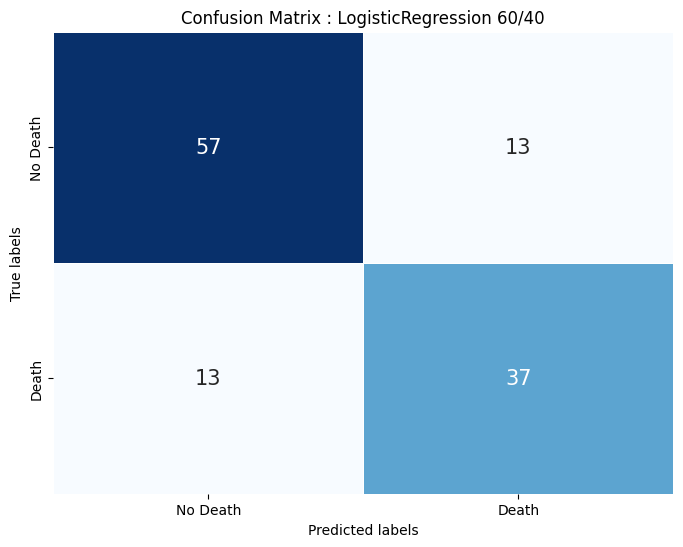

In [ ]:
# lr_model is with the best parameters found during tuning
# Fitting 3 folds for each of 100 candidates, totalling 300 fits
lr_params = {'solver': 'saga', 'penalty': 'l2', 'C': 0.001}

# Instantiate LogisticRegression with tuned parameters
lr_model = LogisticRegression(**lr_params, class_weight='balanced', max_iter=10000, random_state=42)

# Fit the model on scaled training data
lr_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test_scaled)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: LogisticRegression 60/40")
print(conf_matrix)
print()


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 15}, linewidths=0.5)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix : LogisticRegression 60/40')
plt.xticks([0.5, 1.5], ['No Death', 'Death'])
plt.yticks([0.5, 1.5], ['No Death', 'Death'])
plt.show()


True Negatives (TN): 57 Top Left Cases were correctly predicted as No Death.

False Positives (FP): 13 Top Right Cases were incorrectly predicted as Death.

False Negatives (FN): 13 Bottom Left Cases were incorrectly predicted as No Death when actual is Death.

True Positives (TP): 37 Bottom Right Cases were correctly predicted as Death.

Accuracy: 78.33% (57 + 37) / (57 + 13 + 13 + 37)

Precision: 74% 37 / (37 + 13)

Recall(Sensitivity): 74% 37 / (37 + 13)

F1 Score: 74% 2 X (P * R) / P + R

Despite some challenges, the logistic regression model at the 80/20 split demonstrates reasonable performance in predicting deaths, aligning well with the goals of healthcare-related predictive modeling—balancing accuracy with interpretability and clinical relevance.

## Summary of Findings

- **Dataset Overview:**
  - The dataset comprises 299 patients with 13 clinical variables, including demographic factors, clinical measurements, and health conditions.

- **Key Insights:**
  - **Demographics and Health Conditions:** The dataset predominantly includes adult male patients (64.88%), with significant proportions affected by anaemia (43%), diabetes (42%), and high blood pressure (35%).
  - **Clinical Measurements:** Notable averages include ejection fraction (mean ~38.08%), serum creatinine (mean ~1.39 mg/dL), serum sodium (mean ~136.63 mEq/L), and platelet count (mean ~263,358 kiloplatelets/mL), indicating variability across patients.
  - **Follow-up Period:** Patients were monitored for an average of ~130.26 days, offering insights into the duration of study follow-up.

- **Feature Importance:**
  - Through various feature selection methods, the following features were consistently identified as predictive of heart failure: 'ejection_fraction', 'serum_creatinine', and 'time'.

## Model Evaluation and Selection

- **Model Performance:**
  - **Tuned Logistic Regression: 60/40 split** Achieved an accuracy of 77.50% with a precision of 72.55%, recall of 74.00%, and F1 score of 73.27%, showcasing balanced performance across metrics.
  - **Tuned Random Forest Classifier: 70/30 split** Achieved an accuracy of 80% with a precision of 77.14%, recall of 72.97%, and F1 score of 75%, demonstrating higher precision but lower recall compared to Logistic Regression. However in cross validation showed overfitting.
- **Model Selection Rationale:**
  - Logistic Regression was chosen as the preferred model due to its balanced performance across accuracy, precision, recall, and F1 score metrics. It consistently predicts outcomes effectively without significant trade-offs in precision, recall or overfitting.
  - The 60/40 split was selected for its ability to generalize well while maintaining robust metrics, indicating reliable performance in predicting heart disease. Logistic Regression's ability to provide interpretable results further supports its suitability for healthcare decision-making.

## Clinical Implications and Recommendations

- **Clinical Insights:**
  - The identified predictors can aid healthcare providers in prioritizing interventions and monitoring strategies for patients at higher risk of heart failure.
  - Examples of practical applications include personalized treatment plans based on patient demographics and clinical measurements.

## Limitations and Future Directions

- **Study Limitations:**
  - Potential limitations include the dataset's size and scope, as well as assumptions made during model training.
  - Further validation in diverse patient populations and incorporation of additional clinical variables could enhance model robustness.

- **Future Research Directions:**
  - Future studies could consider exploring additional advanced machine learning techniques or ensemble methods to further enhance predictive accuracy and generalize findings beyond the scope of this project.
  - Research focusing on real-time predictive modeling and integration with electronic health records could further enhance clinical decision support systems.


